In [7]:
!pip install rdkit-pypi

     |████████████████████████████████| 20.6 MB 65.1 MB/s 


In [67]:
# Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.Chem import Draw, MolFromSmiles, MolToSmiles
#from scipy.spatial.distance import pdist, squareform

# count co-formers frequency

In [5]:
# Import the co-crystals dataset
cocrystals = pd.read_csv('/content/csd_cocrystals2020.csv', encoding='latin1')

In [9]:
# Sort the co-formers based on molecular weight

def feature_first(a, b, w_a, w_b):
    ''' Sorting the smiles strings by having the heavier first '''
    f, s = (a, b) if w_a > w_b else (b,a)
    return f,s

def feature_apply(smi):
    return feature_first(smi[0], smi[1], Chem.Descriptors.MolWt(Chem.MolFromSmiles(smi[0])), 
    Chem.Descriptors.MolWt(Chem.MolFromSmiles(smi[1])))


In [10]:
cocrystals

,csd_id,name,smiles1,smiles2,year,functionality,group
0,IANNOB,p-Iodoaniline-S-trinitrobenzene complex,Nc1ccc(I)cc1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1943,weak_bond,1
1,CLAHMB,Chloranil-hexamethylbenzene complex,ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)Cl,Cc1c(C)c(C)c(C)c(C)c1C,1962,weak_bond,1
2,MTHMAD,9-Methyladenine-1-methylthymine complex,CN1C=Nc2c(N)ncnc12,CN1C=C(C)C(=O)NC1=O,1963,h-bond,2
3,PERFAN,Perylene-fluoranil complex,c1cc2cccc3c4cccc5cccc(c(c1)c23)c45,FC1=C(F)C(=O)C(=C(F)C1=O)F,1963,weak_bond,1
4,ANCTNB,Anthracene trinitrobenzene,c1ccc2cc3ccccc3cc2c1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1964,weak_bond,1
...,...,...,...,...,...,...,...
7474,UKITEQ,"3-(3,4,5-trimethoxyphenyl)prop-2-enoic acid se...",Cc1cccc2SC(=Nc12)N,COc1cc(C=CC(O)=O)cc(OC)c1OC,2021,h-bond,2
7475,UKITUG,"hemikis(decanedioic acid) 4-methyl-1,3-benzoth...",Cc1cccc2SC(=Nc12)N,OC(=O)CCCCCCCCC(O)=O,2021,h-bond,2
7476,UKIVIW,"4-methyl-1,3-benzothiazol-2-amine hemikis(buta...",Cc1cccc2SC(=Nc12)N,OC(=O)CC(C(CC(O)=O)C(O)=O)C(O)=O,2021,h-bond,2
7477,ULECEW,"4-phenyl-4H-4Ì?åÈ5-phospholo[3,2-b:4,5-b']bist...",O=P1(c2ccccc2)C2=C(SC=C2)C2=C1C=CS2,Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl,2021,h-bond,2


In [31]:
smiles=[]
for i,j in enumerate(cocrystals.csd_id.values[:]):
  smi1 = cocrystals.smiles1.values[i]
  smi2 = cocrystals.smiles2.values[i]
  smi = [smi1, smi2]
  #print(smi)
  smiles.append(feature_apply(smi))

In [55]:
from collections import Counter
from itertools import chain

coformers1_count = Counter(chain(pd.DataFrame(smiles).iloc[:, 0].values))
print(coformers1_count)

Counter({'Fc1c(F)c(I)c(F)c(F)c1I': 246, 'c1cc(ccn1)C=Cc1ccncc1': 83, 'c1cc(ccn1)c1ccncc1': 66, 'O=P(c1ccccc1)(c1ccccc1)c1ccccc1': 62, 'CN1C=NC2=C1C(=O)N(C)C(=O)N2C': 58, 'C(Cc1ccncc1)c1ccncc1': 56, 'C1COCCOCCOCCOCCOCCO1': 55, 'CN1C(=O)N(C)C2=C(NC=N2)C1=O': 54, 'Fc1c(I)c(F)c(I)c(F)c1I': 52, 'OC(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O': 50, 'Fc1c(F)c(F)c(I)c(I)c1F': 41, 'Fc1c(F)c(I)c(F)c(I)c1F': 37, 'NC(=O)N1c2ccccc2C=Cc2ccccc12': 35, 'O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O': 34, 'Fc1c(F)c(F)c2c(F)c(F)c(F)c(F)c2c1F': 33, 'c1ccc2nc3ccccc3nc2c1': 33, 'c1ccc2nc3ccccc3cc2c1': 32, 'Oc1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O': 31, 'Oc1ccc2ccccc2c1c1c(O)ccc2ccccc12': 30, 'Fc1c(F)c(Br)c(F)c(F)c1Br': 28, 'Cc1cc(C)nc(NS(=O)(=O)c2ccc(N)cc2)n1': 27, 'FC(F)(I)C(F)(F)C(F)(F)C(F)(F)I': 26, 'OC(=O)c1ccc(O)cc1': 24, 'OC1=C(Cl)C(=O)C(=C(Cl)C1=O)O': 23, 'N#CC(C#N)=C1C=CC(C=C1)=C(C#N)C#N': 22, 'C1N2CN3CN1CN(C2)C3': 22, 'OC(=O)CCC(O)=O': 22, 'OC(=O)c1ccc(cc1)N(=O)=O': 22, 'CCOc1ccc(c(OCC)c1)C12CC3(CC(C1)(CC(C2)(C3)c1ccc(OCC)cc1OCC

In [119]:
keys, counts = np.unique(pd.DataFrame(smiles).iloc[:, 0].values, return_counts=True)
mols = pd.concat([pd.DataFrame(keys, columns=['name']), pd.DataFrame(counts, columns=['counts'])],axis=1)
mol = mols.sort_values(by=['counts'], ascending=False)
mol.head(10)

,name,counts
1640,Fc1c(F)c(I)c(F)c(F)c1I,246
2885,c1cc(ccn1)C=Cc1ccncc1,83
2893,c1cc(ccn1)c1ccncc1,66
2226,O=P(c1ccccc1)(c1ccccc1)c1ccccc1,62
1011,CN1C=NC2=C1C(=O)N(C)C(=O)N2C,58
85,C(Cc1ccncc1)c1ccncc1,56
176,C1COCCOCCOCCOCCOCCO1,55
993,CN1C(=O)N(C)C2=C(NC=N2)C1=O,54
1661,Fc1c(I)c(F)c(I)c(F)c1I,52
2454,OC(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,50


In [120]:
from rdkit.Chem import rdDepictor

mol_list = [Chem.MolFromSmiles(smiles) for smiles in mol.name.values[:10]]
fig=Chem.Draw.MolsToGridImage(mol_list, molsPerRow=5,legends= ['Count : %s'%i for i in mol.head(10).counts] , subImgSize=(150,150),useSVG=True)
#rdDepictor.SetPreferCoordGen(True)
with open('filename.svg', 'w') as f:
  f.write(fig)

#fig.save('output.svg')
#fig

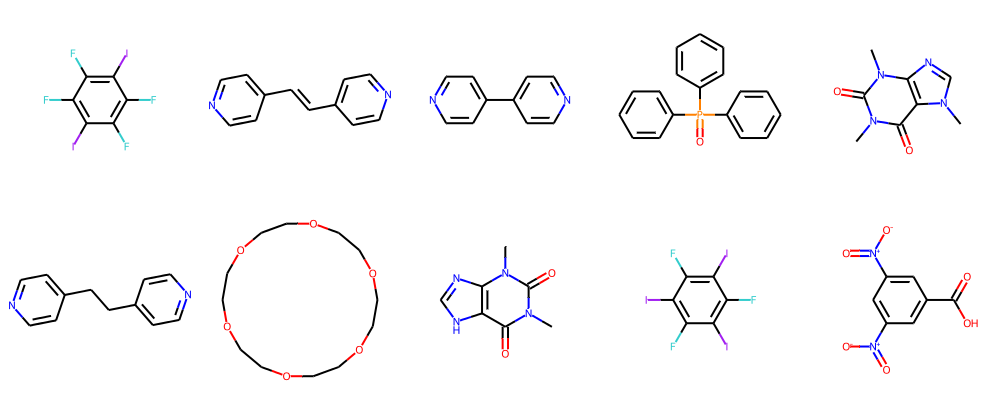

In [85]:
mol_list = [Chem.MolFromSmiles(smiles) for smiles in mol.name.values[:10]]
Chem.Draw.MolsToGridImage(mol_list, molsPerRow=5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.


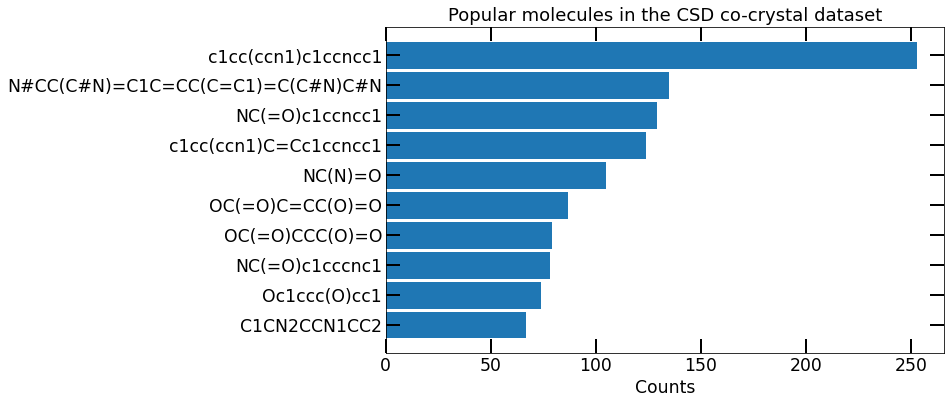

In [64]:
import matplotlib.font_manager
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.rcParams["font.weight"] = "normal"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams["font.sans-serif"] = "Helvetica"
plt.rcParams["axes.labelsize"] = "xx-large"
plt.rcParams["axes.labelweight"]= "normal"
plt.rcParams["xtick.labelsize"] = "xx-large"
plt.rcParams["ytick.labelsize"] = "xx-large"

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(mol.name.head(10).values, mol.counts.head(10).values, align='center', height= 0.9)
plt.gca().invert_yaxis()


ax.axis(aspect='equal')
ax.set(adjustable='box')#, aspect='equal')
ax.grid(False)
ax.set_facecolor('xkcd:white')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.axis('on')
ax.set_facecolor('xkcd:white')
ax.set_title('Popular molecules in the CSD co-crystal dataset', fontsize=18)
ax.tick_params(axis = 'both', which='both', width=2)
ax.tick_params(axis = 'both', which='major', length=14)
ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
ax.set_xlabel('Counts')
#plt.savefig('count_popularity.png', bbox_inches='tight', dpi=600)
plt.show()

In [56]:
coformers2_count = Counter(chain(pd.DataFrame(smiles).iloc[:, 1].values))
print(coformers2_count)

Counter({'c1cc(ccn1)c1ccncc1': 253, 'N#CC(C#N)=C1C=CC(C=C1)=C(C#N)C#N': 135, 'NC(=O)c1ccncc1': 129, 'c1cc(ccn1)C=Cc1ccncc1': 124, 'NC(N)=O': 105, 'OC(=O)C=CC(O)=O': 87, 'OC(=O)CCC(O)=O': 79, 'NC(=O)c1cccnc1': 78, 'Oc1ccc(O)cc1': 74, 'C1CN2CCN1CC2': 67, 'C(Cc1ccncc1)c1ccncc1': 64, 'N#Cc1cc(C#N)c(cc1C#N)C#N': 62, 'Oc1cccc(O)c1': 61, 'OC(=O)c1ccccc1': 58, 'c1cc2ccc3cccc4ccc(c1)c2c34': 57, 'OC(=O)CCCCC(O)=O': 57, 'c1cnccn1': 52, 'C1N2CN3CN1CN(C2)C3': 50, 'Nc1ccc(cc1)C(O)=O': 50, 'NC(N)=S': 47, 'OC(=O)c1ccccc1O': 45, 'OC(=O)c1ccc(O)cc1': 45, 'CN(C)c1ccncc1': 45, 'N#CC(C#N)=C(C#N)C#N': 43, 'c1ccc2nc3ccccc3nc2c1': 43, 'Nc1ncccn1': 43, 'c1cc(ccn1)N=Nc1ccncc1': 43, 'OC(=O)CCCC(O)=O': 41, 'OC(=O)C(O)=O': 39, 'O=C1C=CC(=O)C=C1': 38, 'O=C1NC=CC=C1': 37, 'OC(=O)CC(O)=O': 37, 'S1C=CSC1=C1SC=CS1': 36, 'N#Cc1ccncc1': 35, 'c1ccc2cc3ccccc3cc2c1': 32, 'Cc1nc(C)c(C)nc1C': 32, 'c1ccc2nc3ccccc3cc2c1': 31, 'O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O': 30, 'CN1C=NC2=C1C(=O)N(C)C(=O)N2C': 30, 'OC(=O)c1ccc(cc1)C(O)=O': 

In [ ]:
# read the csv
# drop those smiles that can't be read from rdkit
# drop duplicates
# drop pairs with very small MW

In [2]:
# plot the distribution of new discoveries per year
# Training co-crystal data
cocrystals= pd.read_csv('/content/drive/MyDrive/cocrystal_design-master/ccdc_ml_cocrystals/data_complete/training_data/new_2020/cocrystals2020.csv')
dataset1 =pd.read_csv('/content/drive/MyDrive/cocrystal_design-master/ccdc_ml_cocrystals/data_complete/training_data/new_2020/dataset1_mordred.csv')
dataset2 =pd.read_csv('/content/drive/MyDrive/cocrystal_design-master/ccdc_ml_cocrystals/data_complete/training_data/new_2020/dataset2_mordred.csv')

FileNotFoundError: ignored

In [ ]:
#devo=pd.read_csv('/content/devolager_test.csv')
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

plt.scatter(np.arange(30), devo.precision, c=devo.label)
plt.xlabel('Ranking')
plt.ylabel('Precision')
roc_auc = roc_auc_score(devo.label ,devo.precision.values )
print('Praziquantel AUC:', roc_auc)

NameError: ignored

In [ ]:
roc_auc = roc_auc_score(devo.label ,devo.precision.values )
print('Praziquantel', roc_auc)

Praziquantel 0.5


In [ ]:
roc_auc = roc_auc_score(rc_label.values, -1*score(deep_SVDD, rc_df.iloc[:,2:].values).cpu().detach().numpy())
print('RC', roc_auc)

In [ ]:
from rdkit.Chem import Descriptors
out = []
for i in range(len(cocrystals.smiles1[:])):
  m1 = Chem.MolFromSmiles(cocrystals.smiles1.loc[i]) 
  m2 = Chem.MolFromSmiles(cocrystals.smiles2.loc[i]) 
  if Descriptors.MolWt(m1) == Descriptors.MolWt(m2):
    print(cocrystals.csd_id.loc[i])
    out.append(cocrystals.csd_id.loc[i])

MPIBTZ
BAXGAI
CAWPEV10
CUCWAY
GATZUW
SIHBOA
JITXAL
KOTPEO
HAXVEH
TEMDEU
NEZMOU
GIZSIR
EMOMOI
HUMLUW01
ULOBOM
ITIXUE
PUBMUU20
ADOFIJ
DAYHUH
LEPZUC
BEWKUJ14
NUTHAN
OGEKAN
COTJAX
DOLCAJ
DOQJID
KOMVIS
NUWKIB
QOSXEC
QOVCIO
VORDAI
DULJEA
KACPEL
PABNIR
TAJHET
WACSAW
AQIKOB
ASIWIJ
ATOGUM
BAGCAP
BAGDUK
MAYWOA
TAPMUU
UMUYOR
USACOH
UZOXUD
REGCIR
AXEJOE
DEXWEK
PEQMIJ
SIDSEF
VIPQAO
CIVFEU
DIWTOU
DOTKII
HOCLAO
KOVBII
RONZOL
WOJBOO
AJAVAK
BENRIY
CUYZAZ
XUKNEY
JAJTOG
SUYBUL
BAGKIG
FEFMEL
ICOKAP
LAXJOM
PALLIA
WAXJOX
XAXGEL
CEYNUS
JEYCIC
JITNUY
LIDPUM
MILJAV
PEZXEA
YIMYOL
BIYQOS
CIMETD05
DUGCUG
FIMHUH
KOWFIO
NONNOW
RIPXOG
VOBYET
BOXSIT
IHOCAM
NAKWUV
OJUSUK
UHUTID


In [ ]:
len(out)
cocrystals = cocrystals[~cocrystals.csd_id.isin(out)]

In [ ]:
cocrystals.to_csv('/content/drive/MyDrive/cocrystal_design-master/ccdc_ml_cocrystals/data_complete/training_data/new_2020/cocrystals2020_cleaned.csv')

In [ ]:
cocrystals = pd.read_csv('/content/drive/MyDrive/cocrystal_design-master/ccdc_ml_cocrystals/data_complete/training_data/new_2020/cocrystals2020_cleaned.csv')
cocrystals.head()

,Unnamed: 0,csd_id,name,smiles1,smiles2,year
0,0,IANNOB,p-Iodoaniline-S-trinitrobenzene complex,Nc1ccc(I)cc1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1943
1,1,CLAHMB,Chloranil-hexamethylbenzene complex,ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)Cl,Cc1c(C)c(C)c(C)c(C)c1C,1962
2,2,MTHMAD,9-Methyladenine-1-methylthymine complex,CN1C=Nc2c(N)ncnc12,CN1C=C(C)C(=O)NC1=O,1963
3,3,PERFAN,Perylene-fluoranil complex,c1cc2cccc3c4cccc5cccc(c(c1)c23)c45,FC1=C(F)C(=O)C(=C(F)C1=O)F,1963
4,4,ANCTNB,Anthracene trinitrobenzene,c1ccc2cc3ccccc3cc2c1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1964


In [ ]:
!pip install rdkit-pypi
from rdkit import Chem
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import DrawingOptions

     |████████████████████████████████| 18.6MB 164kB/s 


In [ ]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.FilterCatalog import *
functionalGroups = GetFunctionalGroupHierarchy()
[match.filterMatch.GetName() 
    for match in functionalGroups.GetFilterMatches(
        MolFromSmiles('O=C1C=CC(=O)C=C1'))]

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.
  return f(*args, **kwds)


[]

In [ ]:
id1 = []
for i,j in enumerate(df1):
  if Chem.MolFromSmiles(j) == None:
    id1.append(cocrystals.csd_id.loc[i])

id2 = []
for i,j in enumerate(df2):
  if Chem.MolFromSmiles(j) == None:
    id2.append(cocrystals.csd_id.loc[i])

In [ ]:
def smile_to_paw(smile):
  mol = Chem.MolFromSmiles(smile)
  return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096, useChirality=True)
  #morgan_fingerprint(smile,4096)
  #AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096, useChirality=True)  #4096

def kat_paws(smiles):
  paws = []
  for smile in smiles:
    paws.append(np.asarray(smile_to_paw(smile)))
  return paws

def kat_paws_from_df(smiles, prefix):
  df = pd.DataFrame(kat_paws(smiles))
  columns = [f'{prefix}_{i}' for i in df.columns]
  df.columns = columns
  return df

In [ ]:
cocrystals = cocrystals[~cocrystals.csd_id.isin(set(id1+id2))]
df1 = cocrystals.smiles1.values[:]
df2 = cocrystals.smiles2.values[:]

In [ ]:
#df_paws = pd.concat([pd.DataFrame(cocrystals.values,columns=cocrystals.columns.values) ,kat_paws_from_df(df1, 'paws_1'), kat_paws_from_df(df2, 'paws_2'), pd.DataFrame(cocrystals.year.values,columns =['year'])], axis=1)
df_paws=df_paws.drop_duplicates(subset= df_paws.columns.values[6:])

In [ ]:
df.csd_id.iloc[1974]

'GUHKUS'

In [ ]:
out1=[]
for j,i in enumerate(df.smiles2):
  if len(i)<=3:
    out1.append(df.csd_id.iloc[j])

out2=[]
for j,i in enumerate(df.smiles2):
  if len(i)<=3:
    out2.append(df.csd_id.iloc[j])
out=set(out1+out2)
len(out)

6

In [ ]:
df = df[~df.csd_id.isin(out)]
df.to_csv('/content/cocrystals2020.csv', index=False)

In [ ]:
average_len=[]
for i in range(len(cocrystals.smiles1)):
  average_len.append((len(cocrystals.smiles1.loc[i]) + len(cocrystals.smiles2.loc[i])))

In [ ]:
cocrystals['len'] = average_len
cocrystals

,Unnamed: 0,csd_id,name,smiles1,smiles2,year,len
0,0,IANNOB,p-Iodoaniline-S-trinitrobenzene complex,Nc1ccc(I)cc1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1943,45
1,1,CLAHMB,Chloranil-hexamethylbenzene complex,ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)Cl,Cc1c(C)c(C)c(C)c(C)c1C,1962,52
2,2,MTHMAD,9-Methyladenine-1-methylthymine complex,CN1C=Nc2c(N)ncnc12,CN1C=C(C)C(=O)NC1=O,1963,37
3,3,PERFAN,Perylene-fluoranil complex,c1cc2cccc3c4cccc5cccc(c(c1)c23)c45,FC1=C(F)C(=O)C(=C(F)C1=O)F,1963,60
4,4,ANCTNB,Anthracene trinitrobenzene,c1ccc2cc3ccccc3cc2c1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1964,53
...,...,...,...,...,...,...,...
7475,7567,UKITEQ,"3-(3,4,5-trimethoxyphenyl)prop-2-enoic acid se...",Cc1cccc2SC(=Nc12)N,COc1cc(C=CC(O)=O)cc(OC)c1OC,2021,45
7476,7568,UKITUG,"hemikis(decanedioic acid) 4-methyl-1,3-benzoth...",Cc1cccc2SC(=Nc12)N,OC(=O)CCCCCCCCC(O)=O,2021,38
7477,7569,UKIVIW,"4-methyl-1,3-benzothiazol-2-amine hemikis(buta...",Cc1cccc2SC(=Nc12)N,OC(=O)CC(C(CC(O)=O)C(O)=O)C(O)=O,2021,50
7478,7570,ULECEW,"4-phenyl-4H-4Î»5-phospholo[3,2-b:4,5-b']bisthi...",O=P1(c2ccccc2)C2=C(SC=C2)C2=C1C=CS2,Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl,2021,61


In [ ]:
keys = cocrystals.year.values
val = cocrystals.groupby(cocrystals.year)['len'].transform('mean')
items = dict(zip(keys, val))
items.values()

dict_values([45.0, 52.0, 48.5, 49.666666666666664, 50.4, 49.0, 38.0, 40.77777777777778, 42.84615384615385, 42.57142857142857, 41.666666666666664, 40.6, 48.294117647058826, 46.714285714285715, 46.6, 51.5, 47.666666666666664, 50.15, 41.6875, 53.375, 58.5, 49.22222222222222, 59.833333333333336, 45.333333333333336, 54.833333333333336, 52.96666666666667, 51.15384615384615, 53.925925925925924, 57.07142857142857, 48.11764705882353, 55.76923076923077, 64.65625, 65.23076923076923, 56.111111111111114, 61.02040816326531, 56.88461538461539, 52.6144578313253, 50.10526315789474, 62.87096774193548, 55.611111111111114, 50.81512605042017, 57.13125, 51.42857142857143, 55.3394495412844, 54.13333333333333, 53.87222222222222, 50.842424242424244, 48.25, 48.908396946564885, 51.457142857142856, 50.58024691358025, 49.43603133159269, 58.528528528528525, 54.23157894736842, 56.00845665961945, 57.5650406504065, 58.1605415860735, 55.65046728971963, 62.151571164510166, 59.851778656126484, 54.91379310344828])

In [ ]:
p=cocrystals['year'].value_counts()
p

2019    541
2018    535
2017    517
2020    506
2016    492
       ... 
1966      5
1964      3
1963      2
1943      1
1962      1
Name: year, Length: 61, dtype: int64

In [ ]:
data = pd.concat([pd.DataFrame(p.index, columns=['year']),pd.DataFrame(p.values, columns=['counts'])], axis=1)
data = data.sort_values(by=['year'])
data = data[data.year!=2021]

In [ ]:
for i in data.year:
  print(items[i])

45.0
52.0
48.5
49.666666666666664
50.4
49.0
38.0
40.77777777777778
42.84615384615385
42.57142857142857
41.666666666666664
40.6
48.294117647058826
46.714285714285715
46.6
51.5
47.666666666666664
50.15
41.6875
53.375
58.5
49.22222222222222
59.833333333333336
45.333333333333336
54.833333333333336
52.96666666666667
51.15384615384615
53.925925925925924
57.07142857142857
48.11764705882353
55.76923076923077
64.65625
65.23076923076923
56.111111111111114
61.02040816326531
56.88461538461539
52.6144578313253
50.10526315789474
62.87096774193548
55.611111111111114
50.81512605042017
57.13125
51.42857142857143
55.3394495412844
54.13333333333333
53.87222222222222
50.842424242424244
48.25
48.908396946564885
51.457142857142856
50.58024691358025
49.43603133159269
58.528528528528525
54.23157894736842
56.00845665961945
57.5650406504065
58.1605415860735
55.65046728971963
62.151571164510166
59.851778656126484


In [ ]:
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Regular.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Light.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-SemiBold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
!wget --recursive --no-parent 'https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Bold.ttf' -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf


--2021-05-22 17:19:11--  https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Regular.ttf
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-05-22 17:19:11 ERROR 404: Not Found.

--2021-05-22 17:19:11--  https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-Light.ttf
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-05-22 17:19:12 ERROR 404: Not Found.

--2021-05-22 17:19:12--  https://github.com/google/fonts/raw/master/apache/opensans/OpenSans-SemiBold.ttf
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-05-22 17:19:12 ERROR 404: Not Found.

--2021-05-22 17:19:12--  https://gi

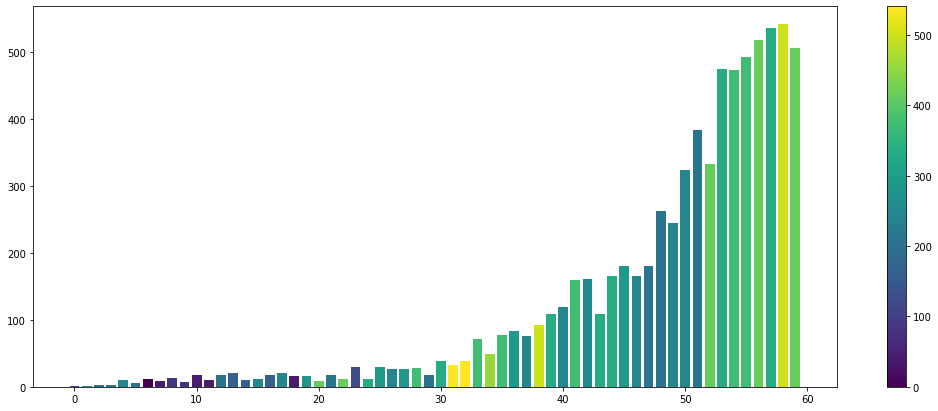

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib import cm
mpl.font_manager._rebuild()

# Use the newly integrated Roboto font family for all text.
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots(figsize=(18,7))
x = data.year.values
energy = data.counts.values
x_pos = [i for i, _ in enumerate(x)]

y = [int(items[i]) for i in x]
cy = [(i-min(y))/(max(y)-min(y)) for i in y]

my_cmap = plt.cm.get_cmap('viridis')

norm=mcolors.LogNorm()

from matplotlib.cm import ScalarMappable
ax.bar(x_pos, energy, color=colors)#
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(energy)))

sm.set_array([])
#cbar.set_label('Color', rotation=270,labelpad=25)
sm.set_array([])
#cbaxes = inset_axes(ax, width="30%", height="3%", loc=2)
plt.colorbar(sm, ax=ax)#, orientation='horizontal', ticks=[0,2,4,6,8,10])

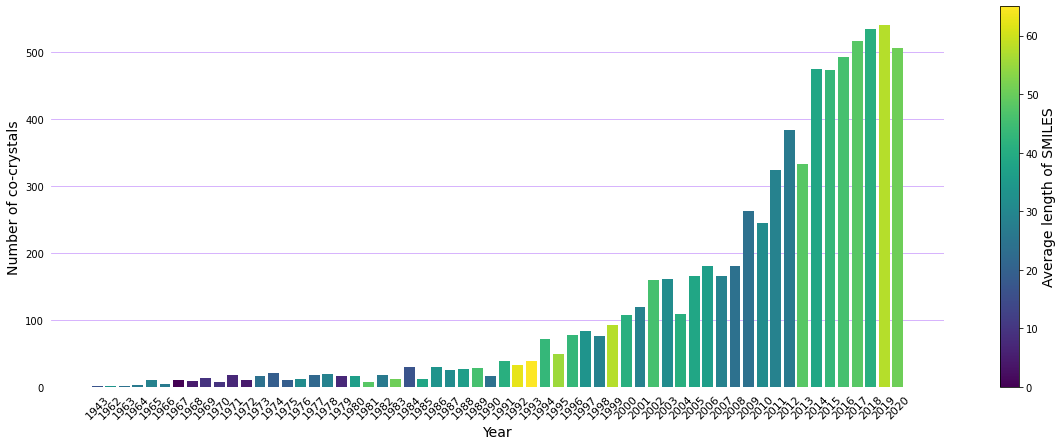

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib import cm
mpl.font_manager._rebuild()

# Use the newly integrated Roboto font family for all text.
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots(figsize=(20,7))
x = data.year.values
energy = data.counts.values
x_pos = [i for i, _ in enumerate(x)]

y = [int(items[i]) for i in x]
cy = [(i-min(y))/(max(y)-min(y)) for i in y]
my_cmap = plt.cm.get_cmap('viridis')
colors = my_cmap(cy)
from matplotlib.cm import ScalarMappable
ax.bar(x_pos, energy, color=colors)#
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(y)))

sm.set_array([])
#cbar.set_label('Color', rotation=270,labelpad=25)
sm.set_array([])
#cbaxes = inset_axes(ax, width="30%", height="3%", loc=2)
cbar = plt.colorbar(sm, ax=ax)#, orientation='horizontal')
cbar.set_label('Average length of SMILES', fontsize=14)#, rotation=270)

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False) #set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#cea2fd') #EEEEEE
ax.xaxis.grid(False)
ax.set_facecolor('white')
#ax = fig.add_axes((left, bottom, width, height))
fig.patch.set_visible(False)
ax.axis('on')
#plt.style.use('ggplot')



plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of co-crystals", fontsize=14)
ax.xaxis.set_tick_params(rotation=45)
plt.xticks(x_pos, x, fontsize=11)
plt.savefig('/content/fig.svg', dpi=600,bbox_inches='tight')
#plt.xlim(1943, 2020)
plt.show()

In [ ]:
cocrystals# = pd.DataFrame(cocrystals.values, columns=cocrystals.columns.values)

,csd_id,name,smiles1,smiles2,year
0,IANNOB,p-Iodoaniline-S-trinitrobenzene complex,Nc1ccc(I)cc1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1943
1,CLAHMB,Chloranil-hexamethylbenzene complex,ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)Cl,Cc1c(C)c(C)c(C)c(C)c1C,1962
2,MTHMAD,9-Methyladenine-1-methylthymine complex,CN1C=Nc2c(N)ncnc12,CN1C=C(C)C(=O)NC1=O,1963
3,PERFAN,Perylene-fluoranil complex,c1cc2cccc3c4cccc5cccc(c(c1)c23)c45,FC1=C(F)C(=O)C(=C(F)C1=O)F,1963
4,ANCTNB,Anthracene trinitrobenzene,c1ccc2cc3ccccc3cc2c1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1964
...,...,...,...,...,...
7475,UKITEQ,"3-(3,4,5-trimethoxyphenyl)prop-2-enoic acid se...",Cc1cccc2SC(=Nc12)N,COc1cc(C=CC(O)=O)cc(OC)c1OC,2021
7476,UKITUG,"hemikis(decanedioic acid) 4-methyl-1,3-benzoth...",Cc1cccc2SC(=Nc12)N,OC(=O)CCCCCCCCC(O)=O,2021
7477,UKIVIW,"4-methyl-1,3-benzothiazol-2-amine hemikis(buta...",Cc1cccc2SC(=Nc12)N,OC(=O)CC(C(CC(O)=O)C(O)=O)C(O)=O,2021
7478,ULECEW,"4-phenyl-4H-4Î»5-phospholo[3,2-b:4,5-b']bisthi...",O=P1(c2ccccc2)C2=C(SC=C2)C2=C1C=CS2,Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl,2021


In [ ]:
cocrystals = pd.read_csv('/content/drive/MyDrive/cocrystal_design-master/ccdc_ml_cocrystals/data_complete/training_data/new_2020/cocrystals2020_cleaned.csv')
cocrystals.head()

,Unnamed: 0,csd_id,name,smiles1,smiles2,year
0,0,IANNOB,p-Iodoaniline-S-trinitrobenzene complex,Nc1ccc(I)cc1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1943
1,1,CLAHMB,Chloranil-hexamethylbenzene complex,ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)Cl,Cc1c(C)c(C)c(C)c(C)c1C,1962
2,2,MTHMAD,9-Methyladenine-1-methylthymine complex,CN1C=Nc2c(N)ncnc12,CN1C=C(C)C(=O)NC1=O,1963
3,3,PERFAN,Perylene-fluoranil complex,c1cc2cccc3c4cccc5cccc(c(c1)c23)c45,FC1=C(F)C(=O)C(=C(F)C1=O)F,1963
4,4,ANCTNB,Anthracene trinitrobenzene,c1ccc2cc3ccccc3cc2c1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1964


In [ ]:
cocrystals = cocrystals[cocrystals.csd_id != 'GUPXUN']
cocrystals

,Unnamed: 0,csd_id,name,smiles1,smiles2,year
0,0,IANNOB,p-Iodoaniline-S-trinitrobenzene complex,Nc1ccc(I)cc1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1943
1,1,CLAHMB,Chloranil-hexamethylbenzene complex,ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)Cl,Cc1c(C)c(C)c(C)c(C)c1C,1962
2,2,MTHMAD,9-Methyladenine-1-methylthymine complex,CN1C=Nc2c(N)ncnc12,CN1C=C(C)C(=O)NC1=O,1963
3,3,PERFAN,Perylene-fluoranil complex,c1cc2cccc3c4cccc5cccc(c(c1)c23)c45,FC1=C(F)C(=O)C(=C(F)C1=O)F,1963
4,4,ANCTNB,Anthracene trinitrobenzene,c1ccc2cc3ccccc3cc2c1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1964
...,...,...,...,...,...,...
7475,7567,UKITEQ,"3-(3,4,5-trimethoxyphenyl)prop-2-enoic acid se...",Cc1cccc2SC(=Nc12)N,COc1cc(C=CC(O)=O)cc(OC)c1OC,2021
7476,7568,UKITUG,"hemikis(decanedioic acid) 4-methyl-1,3-benzoth...",Cc1cccc2SC(=Nc12)N,OC(=O)CCCCCCCCC(O)=O,2021
7477,7569,UKIVIW,"4-methyl-1,3-benzothiazol-2-amine hemikis(buta...",Cc1cccc2SC(=Nc12)N,OC(=O)CC(C(CC(O)=O)C(O)=O)C(O)=O,2021
7478,7570,ULECEW,"4-phenyl-4H-4Î»5-phospholo[3,2-b:4,5-b']bisthi...",O=P1(c2ccccc2)C2=C(SC=C2)C2=C1C=CS2,Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl,2021


In [ ]:
from rdkit.Chem import Descriptors
weak_interactions = []
for i in range(len(cocrystals.smiles1[:])):
  m1 = Chem.MolFromSmiles(cocrystals.smiles1.loc[i]) 
  m2 = Chem.MolFromSmiles(cocrystals.smiles2.loc[i]) 
  if Chem.rdMolDescriptors.CalcNumHeteroatoms(m1) == 0 or Chem.rdMolDescriptors.CalcNumHeteroatoms(m2) == 0:
    weak_interactions.append('weak_bond')
  else:
    weak_interactions.append(0)

In [ ]:
from rdkit.Chem import Descriptors
hbond_oh = []
p = Chem.MolFromSmarts('O=CO')
n= Chem.MolFromSmarts('C(N)=O')
for i in range(len(cocrystals.smiles1[:])):
  m1 = Chem.MolFromSmiles(cocrystals.smiles1.loc[i]) 
  m2 = Chem.MolFromSmiles(cocrystals.smiles2.loc[i]) 
  if m1.HasSubstructMatch(p) == True or m1.HasSubstructMatch(n) == True and m2.HasSubstructMatch(p) == True or m2.HasSubstructMatch(n) == True:
    hbond_oh.append('h_bond_oh')
  else:
    hbond_oh.append(0)

In [ ]:
from rdkit.Chem import Descriptors
hbond_n = []
p = Chem.MolFromSmarts('O=CO')
n= Chem.MolFromSmarts('c1ccncc1')
for i in range(len(cocrystals.smiles1[:])):
  m1 = Chem.MolFromSmiles(cocrystals.smiles1.loc[i]) 
  m2 = Chem.MolFromSmiles(cocrystals.smiles2.loc[i]) 
  if m1.HasSubstructMatch(p) == True or m1.HasSubstructMatch(n) == True and m2.HasSubstructMatch(p) == True or m2.HasSubstructMatch(n) == True:
    hbond_n.append('h_bond_n')
  else:
    hbond_n.append(0)



In [ ]:
cocrystals=pd.DataFrame(cocrystals.values, columns=cocrystals.columns.values)

In [ ]:
from rdkit.Chem import Descriptors
hbond_oh = []
p = Chem.MolFromSmarts('O')

for i in range(len(cocrystals.smiles1[:])):
  m1 = Chem.MolFromSmiles(cocrystals.smiles1.loc[i]) 
  m2 = Chem.MolFromSmiles(cocrystals.smiles2.loc[i]) 
  if m1.HasSubstructMatch(p) == True and m2.HasSubstructMatch(p) == True :
    hbond_oh.append('h-bond')
  else:
    hbond_oh.append(0)
len(hbond_oh)

7479

In [ ]:
pd.concat([cocrystals, pd.DataFrame(hbond_oh, columns=['h-bond'])],axis=1).to_csv('cocrystals2020_test.csv')

          # pd.DataFrame(weak_interactions, columns=['weak_bond']),
          # pd.DataFrame(hbond_n, columns=['hbond_n']) ],axis=1).to_csv('cocrystals2020_clean_functionality.csv')



In [ ]:
from collections import Counter
from itertools import chain


words_count = Counter(chain(hbond_oh))
print(words_count)



Counter({0: 4585, 'h-bond': 2894})


In [ ]:
p = Chem.MolFromSmarts('O=CO')
# define a function where matches are contained in a single fragment
def fragsearch(m,p):
    matches = [set(x) for x in m.GetSubstructMatches(p)]
    frags = [set(y) for y in Chem.GetMolFrags(m)] # had to add this line for code to work
    for frag in frags:
        for match in matches:
            if match.issubset(frag):
                return match
    return False

In [ ]:
m1 = Chem.MolFromSmiles('O=C1OC(=O)c2cc3C(=O)OC(=O)c3cc12')
print(m1.HasSubstructMatch(p))


False


In [ ]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.FilterCatalog import *
functionalGroups = GetFunctionalGroupHierarchy()

#no_functionals=[]
#mol1_funtional=[]
#mol2_functional =[]
both_functional=[]
for i in range(len(cocrystals.smiles1)):
  #print(i)
  m1 = Chem.MolFromSmiles(cocrystals.smiles1.loc[i]) 
  m2 = Chem.MolFromSmiles(cocrystals.smiles2.loc[i])
  f1=[match.filterMatch.GetName() 
    for match in functionalGroups.GetFilterMatches(m1)]
  f2=[match.filterMatch.GetName() 
    for match in functionalGroups.GetFilterMatches(m2)]
  if f1 and f2:
    both_functional.append(cocrystals.csd_id.loc[i])


In [ ]:
if cocrystals.csd_id.loc[0] in no_functionals:
  print('nai')

In [ ]:
labels=[]
for i in cocrystals.csd_id:
  if i in no_functionals:
    labels.append(0)
  if i in both_functional:
    labels.append(1)
  if i in mol1_funtional:
    labels.append(2)
  if i in mol2_functional:
    labels.append(3)

In [ ]:
len(labels)

7480

In [ ]:
pd.concat([cocrystals, pd.DataFrame(labels, columns=['functionality'])], axis=1).to_csv('cocrystals2020_funtionality.csv')

In [ ]:
pub_stats = pd.read_csv('/content/drive/MyDrive/cocrystal_design-master/ccdc_ml_cocrystals/data_complete/training_data/new_2020/cocrystal_publication_statistics.csv')

In [ ]:
pub_stats=pub_stats.sort_values(by='year')
pub_stats = pub_stats[pub_stats.year> 1990]
#.publications_cocrystal_electronic


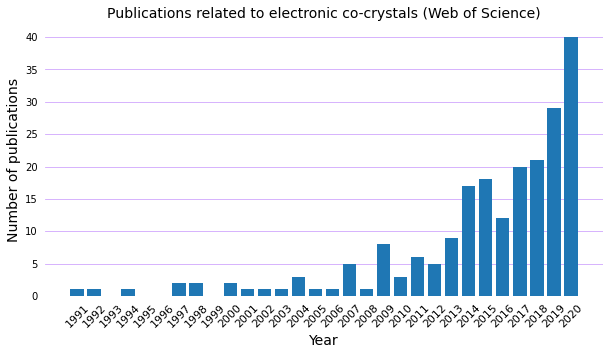

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib import cm
mpl.font_manager._rebuild()

# Use the newly integrated Roboto font family for all text.
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots(figsize=(10,5))
x = pub_stats.year.values
energy = pub_stats.publications_cocrystal_electronic.values
x_pos = [i for i, _ in enumerate(x)]


ax.bar(x_pos, energy)#, color=colors)#

# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False) #set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#cea2fd') #EEEEEE
ax.xaxis.grid(False)
ax.set_facecolor('white')
#ax = fig.add_axes((left, bottom, width, height))
fig.patch.set_visible(False)
ax.axis('on')
#plt.style.use('ggplot')



plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of publications", fontsize=14)
ax.xaxis.set_tick_params(rotation=45)
plt.xticks(x_pos, x, fontsize=11)
plt.title('Publications related to electronic co-crystals (Web of Science)', fontsize=14)
plt.savefig('/content/fig.png', dpi=600,bbox_inches='tight')
#plt.xlim(1943, 2020)
plt.show()

# Functional groups mapping

In [ ]:
cocrystals=pd.read_csv('/content/cocrystals2020_clean_functionality.csv', encoding='latin')
cocrystals

,csd_id,name,smiles1,smiles2,year,functionality,group
0,IANNOB,p-Iodoaniline-S-trinitrobenzene complex,Nc1ccc(I)cc1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1943,weak_bond,1
1,CLAHMB,Chloranil-hexamethylbenzene complex,ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)Cl,Cc1c(C)c(C)c(C)c(C)c1C,1962,weak_bond,1
2,MTHMAD,9-Methyladenine-1-methylthymine complex,CN1C=Nc2c(N)ncnc12,CN1C=C(C)C(=O)NC1=O,1963,h-bond,2
3,PERFAN,Perylene-fluoranil complex,c1cc2cccc3c4cccc5cccc(c(c1)c23)c45,FC1=C(F)C(=O)C(=C(F)C1=O)F,1963,weak_bond,1
4,ANCTNB,Anthracene trinitrobenzene,c1ccc2cc3ccccc3cc2c1,O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O,1964,weak_bond,1
...,...,...,...,...,...,...,...
7474,UKITEQ,"3-(3,4,5-trimethoxyphenyl)prop-2-enoic acid se...",Cc1cccc2SC(=Nc12)N,COc1cc(C=CC(O)=O)cc(OC)c1OC,2021,h-bond,2
7475,UKITUG,"hemikis(decanedioic acid) 4-methyl-1,3-benzoth...",Cc1cccc2SC(=Nc12)N,OC(=O)CCCCCCCCC(O)=O,2021,h-bond,2
7476,UKIVIW,"4-methyl-1,3-benzothiazol-2-amine hemikis(buta...",Cc1cccc2SC(=Nc12)N,OC(=O)CC(C(CC(O)=O)C(O)=O)C(O)=O,2021,h-bond,2
7477,ULECEW,"4-phenyl-4H-4Ì?åÈ5-phospholo[3,2-b:4,5-b']bist...",O=P1(c2ccccc2)C2=C(SC=C2)C2=C1C=CS2,Oc1c(O)c(Cl)c(Cl)c(Cl)c1Cl,2021,h-bond,2


In [ ]:
def smile_to_paw(smile):
  mol = Chem.MolFromSmiles(smile)
  return AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=4096, useChirality=True)
def kat_paws(smiles):
  paws = []
  for smile in smiles:
    paws.append(np.asarray(smile_to_paw(smile)))
  return paws

def kat_paws_from_df(smiles, prefix):
  df = pd.DataFrame(kat_paws(smiles))
  columns = [f'{prefix}_{i}' for i in df.columns]
  df.columns = columns
  return df

In [ ]:
df1 = cocrystals.smiles1.values[:] #dataset1.Smiles1.values[:]
df2 = cocrystals.smiles2.values[:] #dataset2.Smiles2.values[:]

In [ ]:
df_paws = pd.concat([kat_paws_from_df(df1[:], 'paws_1'), kat_paws_from_df(df2[:], 'paws_2')], axis=1)
df_paws

,paws_1_0,paws_1_1,paws_1_2,paws_1_3,paws_1_4,paws_1_5,paws_1_6,paws_1_7,paws_1_8,paws_1_9,paws_1_10,paws_1_11,paws_1_12,paws_1_13,paws_1_14,paws_1_15,paws_1_16,paws_1_17,paws_1_18,paws_1_19,paws_1_20,paws_1_21,paws_1_22,paws_1_23,paws_1_24,paws_1_25,paws_1_26,paws_1_27,paws_1_28,paws_1_29,paws_1_30,paws_1_31,paws_1_32,paws_1_33,paws_1_34,paws_1_35,paws_1_36,paws_1_37,paws_1_38,paws_1_39,...,paws_2_4056,paws_2_4057,paws_2_4058,paws_2_4059,paws_2_4060,paws_2_4061,paws_2_4062,paws_2_4063,paws_2_4064,paws_2_4065,paws_2_4066,paws_2_4067,paws_2_4068,paws_2_4069,paws_2_4070,paws_2_4071,paws_2_4072,paws_2_4073,paws_2_4074,paws_2_4075,paws_2_4076,paws_2_4077,paws_2_4078,paws_2_4079,paws_2_4080,paws_2_4081,paws_2_4082,paws_2_4083,paws_2_4084,paws_2_4085,paws_2_4086,paws_2_4087,paws_2_4088,paws_2_4089,paws_2_4090,paws_2_4091,paws_2_4092,paws_2_4093,paws_2_4094,paws_2_4095
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7476,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
!pip install umap-learn

     |████████████████████████████████| 81kB 3.7MB/s 
     |████████████████████████████████| 1.1MB 8.5MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=697ec7079a935574613feb14d56a3934e109395cdc6e69640771f11bf8166616
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.4-cp37-none-any.whl size=52374 sha256=59efbb200c09d5ae55704acf8d6bbb457751e044c6f3a6c53074f13760e5fef9
  Stored in directory: /root/.cache/pip/wheels/42/4b/8c/f6f119c67cf6583bb192431fa8f7278cf95e5b943055077d94
Successfully built umap-learn pynndescent


In [ ]:
import umap

In [ ]:
def tanimoto_dist(a,b):
    dotprod = np.dot(a,b)
    tc = dotprod / (np.sum(a) + np.sum(b) - dotprod)
    return 1.0-tc

In [ ]:
umap_model_global = umap.UMAP(metric = tanimoto_dist ,# "jaccard",
                      n_neighbors = 15, min_dist=0.8)
X_umap_global = umap_model_global.fit_transform(df_paws.values)

/usr/local/lib/python3.7/dist-packages/umap/umap_.py:1762: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  "inverse_transform will be unavailable".format(self.metric)


In [ ]:
#from sklearn.manifold import TSNE

#X_umap_global = TSNE(n_components=2).fit_transform(df_paws.values)

In [ ]:
color = cocrystals.funct.values
len(color)

7479

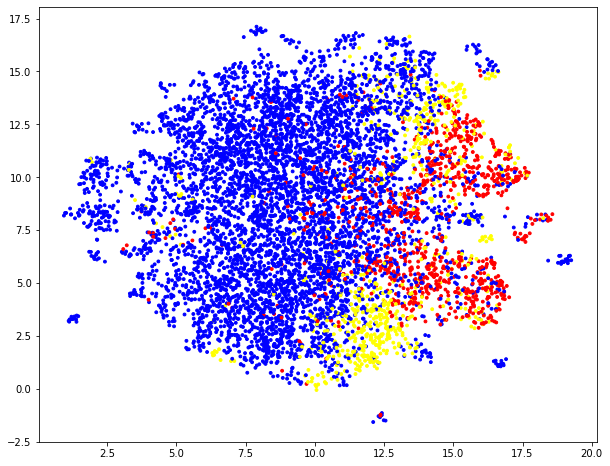

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
cdict = {0: 'yellow' ,1: 'red', 2: 'blue', 3: 'yellow', 4: 'yellow'}

ax.scatter(X_umap_global[:, 0], X_umap_global[:, 1],
            c=[cdict[i] for i in color], s=8, cmap='Spectral')

In [ ]:
results = pd.read_csv('/content/all_results_2.csv')
results

,name,smiles,GNN_auc,Grecu,Wang,Morgan fingerprint,Mordred,NLP fingerprint,Unnamed: 8,Unnamed: 9
0,diclofenac,OC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl,0.8952,0.7500,0.857,0.86,0.8285,0.70,NaN,NaN
1,piracetam,NC(=O)CN1CCCC1=O,0.8052,0.9300,0.895,0.92,0.8210,0.60,NaN,NaN
2,pyrazinecarboxamide,NC(=O)c1cnccn1,0.8000,0.8410,0.876,0.81,0.9400,0.50,NaN,NaN
3,acetazolamide,NS(=O)(=O)c1nnc(s1)NC(=O)C,0.6888,0.7940,0.311,0.94,0.8800,0.40,NaN,NaN
4,indomethacin,Cc1c(c2cc(ccc2n1C(=O)c3ccc(cc3)Cl)OC)CC(=O)O,0.5670,0.6800,0.658,0.77,0.6100,0.76,NaN,NaN
5,drugcandidate,CCC(F)(F)c1cc(nc2SC(=C(N)c12)C(N)=O)N1CCC(CC1)...,0.8970,0.7920,0.986,0.87,0.9100,0.85,NaN,NaN
6,furosemide,o1cccc1CNc(cc2Cl)c(C(=O)O)cc2S(=O)(=O)N,0.8430,0.6500,0.894,0.89,0.8300,0.70,NaN,NaN
7,nalidixicacid,O=C\2c1c(nc(cc1)C)N(/C=C/2C(=O)O)CC,0.7390,1.0000,0.948,0.98,0.8800,0.60,NaN,NaN
8,paracetamol,CC(=O)Nc1ccc(O)cc1,0.5997,0.7676,0.543,0.70,0.6000,0.50,NaN,NaN
9,3-cyanophenol,C1=CC(=CC(=C1)O)C#N,0.9330,0.7600,0.911,0.91,0.9330,0.40,NaN,NaN


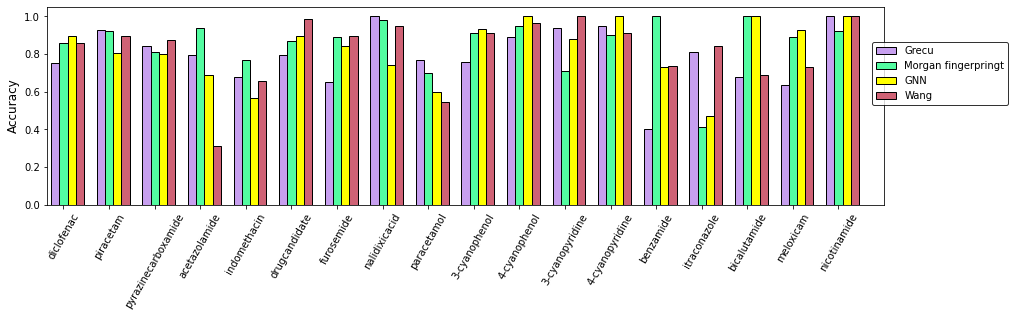

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(211)

## the data
N = 18
grecu = results.Grecu[:-2].values
fingerprint = results['Morgan fingerprint'][:-2].values
GNN = results.GNN_auc[:-2].values
wang = results.Wang[:-2].values

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.18                      # the width of the bars

## the bars
rects1 = ax.bar(ind, grecu, width,
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind+width, fingerprint, width,
                    color='#53fca1',edgecolor='black')

rects3 = ax.bar(ind+2*width, GNN, width,
                    color='yellow',edgecolor='black')

rects4 = ax.bar(ind+3*width, wang, width,  color='#cf6275',edgecolor='black')


# axes and labels
ax.set_xlim(-width, len(ind)+width,len(ind)+2*width)
ax.set_ylim(0,1.05)
ax.set_ylabel('Accuracy', fontsize=12)
#ax.set_title('Scores by group and gender')
xTickMarks = results.name.values[:-2]
ax.set_xticks(ind+width)

xtickNames = ax.set_xticklabels(xTickMarks, fontsize=20)
plt.setp(xtickNames, rotation=60, fontsize=10)

## add a legend
legend = ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0]), ('Grecu', 'Morgan fingerpringt', 'GNN', 'Wang'),bbox_to_anchor=(0.98, 0.85))

legend.get_frame().set_edgecolor('black')#.set_facecolor('white')
plt.savefig('/content/fig.png', dpi=600,bbox_inches='tight')
plt.show()

In [ ]:
results = pd.read_csv('/content/all_results.csv')
results

,Dataset,Mordred,ECFP4_fingerprint,GNN,Smiles,Unnamed: 5,ECFP6_mordred
0,Grecu,0.75,0.77,0.720,0.60,NaN,0.72
1,RC,0.78,0.80,0.730,0.50,NaN,0.72
2,Artemicin,1.00,1.00,1.000,0.60,NaN,0.90
3,Phenolic acids,0.60,0.74,0.640,0.74,NaN,0.64
4,Dicarboxylic acids,0.70,0.71,0.770,0.63,NaN,0.60
5,Mapp_MartaD_Pahs,0.81,0.91,0.720,0.63,NaN,0.65
6,Akeroy,0.70,0.71,0.740,0.55,NaN,0.70
7,Total,0.72,0.75,0.754,0.68,NaN,NaN


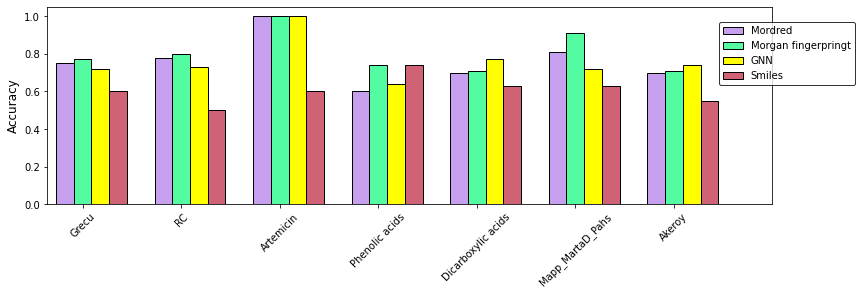

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(211)

## the data
N = 7
mordred = [0.75, 0.78, 1.00, 0.60, 0.70, 0.81, 0.7]
fingerprint = [0.77, 0.8, 1.00, 0.74, 0.71, 0.91, 0.71]
GNN = [0.72, 0.73, 1.00, 0.64, 0.77, 0.72, 0.74]
Smiles = [0.6, 0.5, 0.60, 0.74, 0.63,0.63, 0.55]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.18                      # the width of the bars

## the bars
rects1 = ax.bar(ind, mordred, width,
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))

rects2 = ax.bar(ind+width, fingerprint, width,
                    color='#53fca1',edgecolor='black')

rects3 = ax.bar(ind+2*width, GNN, width,
                    color='yellow',edgecolor='black')

rects4 = ax.bar(ind+3*width, Smiles, width,  color='#cf6275',edgecolor='black')


# axes and labels
ax.set_xlim(-width, len(ind)+width,len(ind)+2*width)
ax.set_ylim(0,1.05)
ax.set_ylabel('Accuracy', fontsize=12)
#ax.set_title('Scores by group and gender')
xTickMarks = results.Dataset.values
ax.set_xticks(ind+width)

xtickNames = ax.set_xticklabels(xTickMarks, fontsize=20)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
legend = ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0]), ('Mordred', 'Morgan fingerpringt', 'GNN', 'Smiles'),bbox_to_anchor=(1.12, 0.95))
plt.savefig('/content/fig.png', dpi=600,bbox_inches='tight')
legend.get_frame().set_edgecolor('black')#.set_facecolor('white')
plt.show()

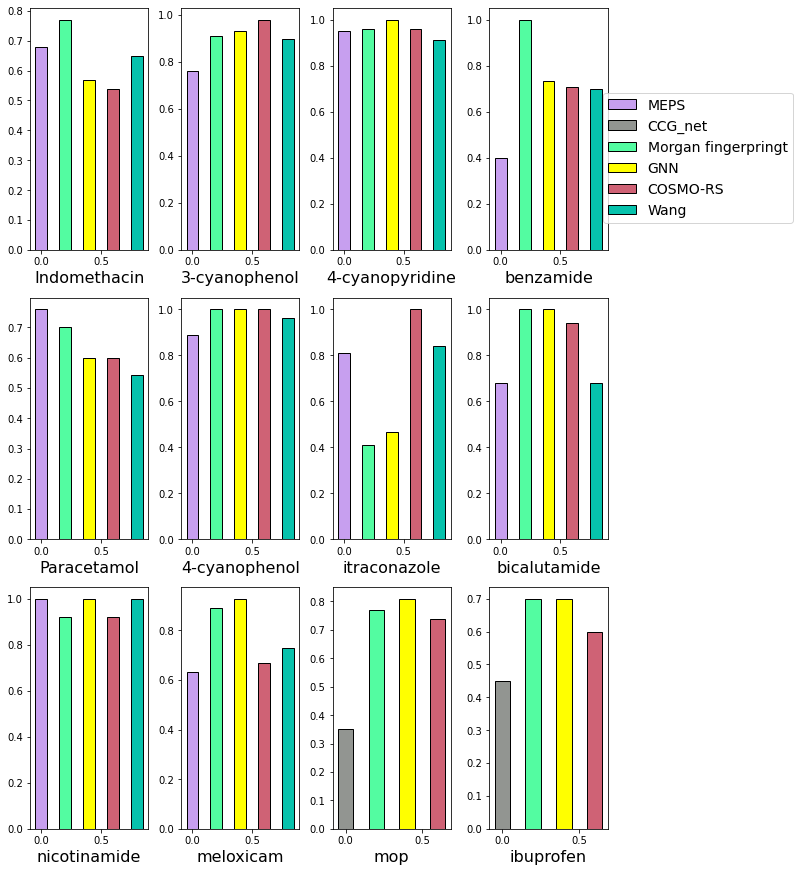

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(24,15))
fig, axs = plt.subplots(3, 4,constrained_layout=True,figsize=(11,12))
#ax = fig.add_subplot(211)
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)


## the data
N = 1
grecu = [0.68, 0.76, 0.76, 0.89, 0.95,0,0, 0.4, 0.81, 0.68, 0.633, 1]
fingerprint = [0.77, 0.7, 0.91, 1, 0.96, 0.77, 0.7, 1, 0.41, 1, 0.89, 0.92]
GNN = [0.57, 0.6, 0.933, 1,1, 0.81, 0.7, 0.733, 0.468, 1, 0.928, 1]
cosmo = [0.54, 0.6, 0.98, 1, 0.96, 0.74, 0.6, 0.71, 1, 0.94, 0.67, 0.92]

## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.1                      # the width of the bars

## Accuracy
rects1 = axs[0, 0].bar(ind, grecu[0], width, 
                color='#c79fef',edgecolor='black')
rects2 = axs[0, 0].bar(ind+2*width, fingerprint[0], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[0, 0].bar(ind+4*width, GNN[0], width,
                    color='yellow',edgecolor='black')
rects4 = axs[0, 0].bar(ind+6*width, cosmo[0], width,  color='#cf6275',edgecolor='black')
rects5 = axs[0, 0].bar(ind+8*width, 0.65, width, color='#06c2ac',edgecolor='black')
axs[0, 0].set_xlabel('Indomethacin', fontsize=16)     

## Paracetamol
rects1 = axs[1, 0].bar(ind, grecu[1], width, 
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[1, 0].bar(ind+2*width, fingerprint[1], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[1, 0].bar(ind+4*width, GNN[1], width,
                    color='yellow',edgecolor='black')
rects4 = axs[1, 0].bar(ind+6*width, cosmo[1], width,  color='#cf6275',edgecolor='black')

rects5 = axs[1, 0].bar(ind+8*width, 0.543, width, color='#06c2ac',edgecolor='black')

axs[1, 0].set_xlabel('Paracetamol', fontsize=16)  


## F1 score
rects1 = axs[0, 1].bar(ind, grecu[2], width, 
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[0, 1].bar(ind+2*width, fingerprint[2], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[0, 1].bar(ind+4*width, GNN[2], width,
                    color='yellow',edgecolor='black')
rects4 = axs[0, 1].bar(ind+6*width, cosmo[2], width,  color='#cf6275',edgecolor='black')
rects5 = axs[0, 1].bar(ind+8*width, 0.9, width, color='#06c2ac',edgecolor='black')
axs[0, 1].set_xlabel('3-cyanophenol', fontsize=16)  

## Spearman
rects1 = axs[1, 1].bar(ind, grecu[3], width,
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[1, 1].bar(ind+2*width, fingerprint[3], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[1, 1].bar(ind+4*width, GNN[3], width,
                    color='yellow',edgecolor='black')
rects4 = axs[1, 1].bar(ind+6*width, cosmo[3], width,  color='#cf6275',edgecolor='black')
rects5 = axs[1, 1].bar(ind+8*width, 0.96, width, color='#06c2ac',edgecolor='black')
axs[1, 1].set_xlabel('4-cyanophenol', fontsize=16) 


## Spearman
rects1 = axs[0, 2].bar(ind, grecu[4], width, 
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[0, 2].bar(ind+2*width, fingerprint[4], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[0, 2].bar(ind+4*width, GNN[4], width,
                    color='yellow',edgecolor='black')
rects4 = axs[0, 2].bar(ind+6*width, cosmo[4], width,  color='#cf6275',edgecolor='black')
rects5 = axs[0, 2].bar(ind+8*width, 0.91, width, color='#06c2ac',edgecolor='black')
axs[0, 2].set_xlabel('4-cyanopyridine', fontsize=16) 


## Spearman
rects1 = axs[0,3].bar(ind, grecu[7], width, 
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[0, 3].bar(ind+2*width, fingerprint[7], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[0, 3].bar(ind+4*width, GNN[7], width,
                    color='yellow',edgecolor='black')
rects4 = axs[0, 3].bar(ind+6*width, cosmo[7], width,  color='#cf6275',edgecolor='black')
rects5 = axs[0, 3].bar(ind+8*width, 0.7, width, color='#06c2ac',edgecolor='black')
axs[0, 3].set_xlabel('benzamide', fontsize=16) 

## Spearman
rects1 = axs[1, 2].bar(ind, grecu[8], width, 
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[1, 2].bar(ind+2*width, fingerprint[8], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[1, 2].bar(ind+4*width, GNN[8], width,
                    color='yellow',edgecolor='black')
rects4 = axs[1, 2].bar(ind+6*width, cosmo[8], width,  color='#cf6275',edgecolor='black')
rects5 = axs[1, 2].bar(ind+8*width, 0.84, width, color='#06c2ac',edgecolor='black')
axs[1, 2].set_xlabel('itraconazole', fontsize=16) 

## Spearman
rects1 = axs[1, 3].bar(ind, grecu[9], width, 
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[1, 3].bar(ind+2*width, fingerprint[9], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[1, 3].bar(ind+4*width, GNN[9], width,
                    color='yellow',edgecolor='black')
rects4 = axs[1, 3].bar(ind+6*width, cosmo[9], width,  color='#cf6275',edgecolor='black')
rects5 = axs[1, 3].bar(ind+8*width, 0.68, width, color='#06c2ac',edgecolor='black')
axs[1, 3].set_xlabel('bicalutamide', fontsize=16) 

## Spearman
rects1 = axs[2, 1].bar(ind, grecu[10], width, 
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[2, 1].bar(ind+2*width, fingerprint[10], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[2, 1].bar(ind+4*width, GNN[10], width,
                    color='yellow',edgecolor='black')
rects4 = axs[2, 1].bar(ind+6*width, cosmo[10], width,  color='#cf6275',edgecolor='black')
rects5 = axs[2, 1].bar(ind+8*width, 0.73, width, color='#06c2ac',edgecolor='black')
axs[2, 1].set_xlabel('meloxicam', fontsize=16) 

## Spearman
rects1 = axs[2, 0].bar(ind, grecu[11], width, 
                color='#c79fef',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[2, 0].bar(ind+2*width, fingerprint[11], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[2, 0].bar(ind+4*width, GNN[11], width,
                    color='yellow',edgecolor='black')
rects4 = axs[2, 0].bar(ind+6*width, cosmo[11], width,  color='#cf6275',edgecolor='black')
rects5 = axs[2, 0].bar(ind+8*width, 1, width, color='#06c2ac',edgecolor='black')
axs[2, 0].set_xlabel('nicotinamide', fontsize=16) 



## MOP
rects1 = axs[2, 2].bar(ind, 0.35, width,
                color='#929591',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[2, 2].bar(ind+2*width, fingerprint[5], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[2, 2].bar(ind+4*width, GNN[5], width,
                    color='yellow',edgecolor='black')
rects4 = axs[2, 2].bar(ind+6*width, cosmo[5], width,  color='#cf6275',edgecolor='black')
axs[2, 2].set_xlabel('mop', fontsize=16) 


## Ibuprophen
rects1 = axs[2, 3].bar(ind, 0.45, width,
                color='#929591',edgecolor='black')
                #error_kw=dict(elinewidth=2,ecolor='red'))
rects2 = axs[2, 3].bar(ind+2*width, fingerprint[6], width,
                    color='#53fca1',edgecolor='black')
rects3 = axs[2, 3].bar(ind+4*width, GNN[6], width,
                    color='yellow',edgecolor='black')
rects4 = axs[2, 3].bar(ind+6*width, cosmo[6], width,  color='#cf6275',edgecolor='black')
axs[2, 3].set_xlabel('ibuprofen', fontsize=16) 


#xtickNames = ax.set_xticklabels(xTickMarks, fontsize=20)
#plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend

legend = axs[0,3].legend( (rects11[0] ,rects1[0], rects2[0],rects3[0],rects4[0],rects5[0]), ('MEPS', 'CCG_net', 'Morgan fingerpringt', 'GNN', 'COSMO-RS', 'Wang'),
                         bbox_to_anchor=(0.9, 0.68), fontsize=14)
plt.savefig('/content/fig.svg', dpi=600,bbox_inches='tight')
#legend.get_frame().set_edgecolor('black')#.set_facecolor('white')
plt.show()

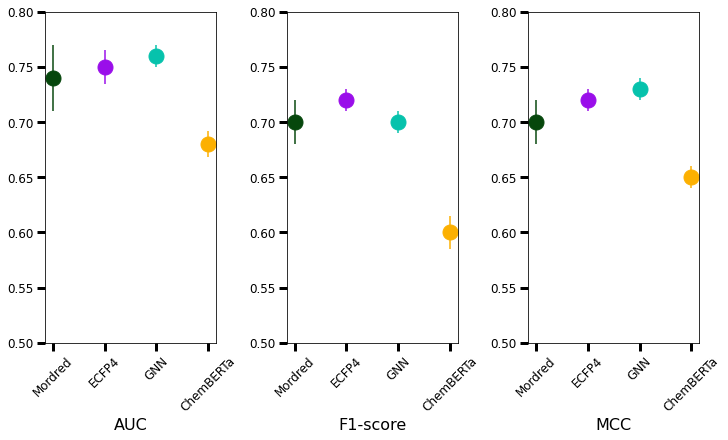

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#fig = plt.figure(figsize=(24,15))
fig, axs = plt.subplots(1, 3,constrained_layout=True,figsize=(10,6))
#ax = fig.add_subplot(211)
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0.2, 0.4, 0.6, 0.8])
    ax.set_xticklabels(labels, fontsize=12, rotation = 45)
    ax.tick_params(axis='y', labelsize=12 )
    ax.tick_params(axis = 'both', which='both', width=3)
    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis = 'both', which='major', length=8)
    ax.set_ylim(0.5, 0.8)


## the data
N = 1
mordred = [0.74, 0.70, 0.40]
fingerprint = [0.75, 0.72, 0.72]
GNN = [0.76, 0.73, 0.7]
Smiles = [0.68, 0.65, 0.60]
labels=['Mordred', 'ECFP4', 'GNN', 'ChemBERTa']
## necessary variables
ind = np.arange(N)                # the x locations for the groups
width = 0.1                      # the width of the bars

## Accuracy
rects1 = axs[0].errorbar(0.2, mordred[0],  yerr= 0.03, fmt='o', markersize=15,
                color='#06470c')
rects2 = axs[0].errorbar(0.4, fingerprint[0],yerr= 0.015, fmt='o', markersize=15,
                    color='#9a0eea')
rects3 = axs[0].errorbar(0.6, GNN[0], yerr= 0.01, fmt='o', markersize=15,
                    color='#06c2ac')
rects4 = axs[0].errorbar(0.8, Smiles[0], yerr= 0.012, fmt='o', markersize=15, color='#fcb001')
#axs[0].set_xlim(-0.01, 0.8)
#axs[0].set_xticklabels(labels, fontsize=12, rotation = 45)
axs[0].set_xlabel('AUC', fontsize=16)     


## F1 score
rects1 = axs[1].errorbar(0.2, 0.7, yerr= 0.02,fmt='o', markersize=15,
                color='#06470c')
rects2 = axs[1].errorbar(0.4, fingerprint[2], yerr= 0.01, fmt='o', markersize=15,
                    color='#9a0eea')
rects3 = axs[1].errorbar(0.6, GNN[2],yerr= 0.01, fmt='o', markersize=15,
                    color='#06c2ac')
rects4 = axs[1].errorbar(0.8, Smiles[2], yerr= 0.015, fmt='o', markersize=15, color='#fcb001')
axs[1].set_xlabel('F1-score', fontsize=16)  


## MCC
rects1 = axs[2].errorbar(0.2, mordred[1], yerr= 0.02,fmt='o', markersize=15,
                color='#06470c')
rects2 = axs[2].errorbar(0.4, fingerprint[1],yerr= 0.01, fmt='o', markersize=15,
                    color='#9a0eea')
rects3 = axs[2].errorbar(0.6, GNN[1], yerr= 0.01, fmt='o', markersize=15,
                    color='#06c2ac')
rects4 = axs[2].errorbar(0.8, Smiles[1], yerr= 0.01, fmt='o', markersize=15, color='#fcb001')
axs[2].set_xlabel('MCC', fontsize=16) 

for ax in [axs[0], axs[1], axs[2]]:
    set_axis_style(ax, labels)

# axes and labels
#ax.set_xlim(-width, len(ind)+width,len(ind)+2*width)
#ax.set_ylim(0,1.05)
#ax.set_ylabel('Accuracy', fontsize=12)
#ax.set_title('Scores by group and gender')
#xTickMarks = results.Dataset.values
#ax.set_xticks(ind+width)

#xtickNames = ax.set_xticklabels(xTickMarks, fontsize=20)
#plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
#legend = axs[2].legend( (rects1[0], rects2[0],rects3[0],rects4[0]), ('Mordred', 'Morgan fingerpringt', 'GNN', 'ChemBERTa'),bbox_to_anchor=(0.82, 0.97))
plt.savefig('/content/fig.png', dpi=600,bbox_inches='tight')
#legend.get_frame().set_edgecolor('black')#.set_facecolor('white')
plt.show()

In [ ]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f43e7bb5750>,
      dtype=object)

In [ ]:
np.ones(2)

array([1., 1.])

In [ ]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3501  100  3501    0     0  19558      0 --:--:-- --:--:-- --:--:-- 19558


add /root/miniconda/lib/python3.7/site-packages to PYTHONPATH
python version: 3.7.10
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added conda-forge to channels
added omnia to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda



In [ ]:
!pip install --pre deepchem
import deepchem
deepchem.__version__

     |████████████████████████████████| 573kB 4.0MB/s 


'2.6.0.dev'

In [ ]:
!pip install condacolab

In [ ]:
import condacolab
condacolab.install() 

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:42
🔁 Restarting kernel...


In [ ]:
!conda install -c tmap tmap

Solving environment: - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - tmap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.4.13  |       h06a4308_1         114 KB
    certifi-2020.12.5          |   py37h06a4308_0         141 KB
    conda-4.10.1               |   py37h06a4308_1         2.9 MB
    ogdf-1.0.1                 |       h6bb024c_0         7.9 MB  tmap
    openssl-1.1.1k             |       h27cfd23_0         2.5 MB
    tmap-1.0.4                 |   py37h6bb024c_0         1.1 MB  tmap
    ------------------------------------------------------------
                                           Total:        14.6 

In [ ]:
!pip install faerun

     |████████████████████████████████| 92kB 3.0MB/s 
     |████████████████████████████████| 184kB 4.8MB/s 
     |████████████████████████████████| 419kB 5.0MB/s 
     |████████████████████████████████| 102kB 5.4MB/s 


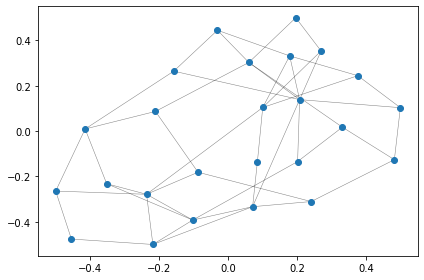

In [ ]:
import tmap as tm
import numpy as np
from matplotlib import pyplot as plt


def main():
    """ Main function """

    n = 25
    edge_list = []

    # Create a random graph
    for i in range(n):
        for j in np.random.randint(0, high=n, size=2):
            edge_list.append([i, j, np.random.rand(1)])

    # Compute the layout
    x, y, s, t, _ = tm.layout_from_edge_list(
        n, edge_list, create_mst=False
    )

    # Plot the edges
    for i in range(len(s)):
        plt.plot(
            [x[s[i]], x[t[i]]],
            [y[s[i]], y[t[i]]],
            "k-",
            linewidth=0.5,
            alpha=0.5,
            zorder=1,
        )

    # Plot the vertices
    plt.scatter(x, y, zorder=2)
    plt.tight_layout()
    #plt.savefig("simple_graph.png")


if __name__ == "__main__":
    main()

In [ ]:
cocrystals.smiles1.str.cat(cocrystals.smiles2)

0           Nc1ccc(I)cc1O=N(=O)c1cc(cc(c1)N(=O)=O)N(=O)=O
1       ClC1=C(Cl)C(=O)C(=C(Cl)C1=O)ClCc1c(C)c(C)c(C)c...
2                   CN1C=Nc2c(N)ncnc12CN1C=C(C)C(=O)NC1=O
3       c1cc2cccc3c4cccc5cccc(c(c1)c23)c45FC1=C(F)C(=O...
4       c1ccc2cc3ccccc3cc2c1O=N(=O)c1cc(cc(c1)N(=O)=O)...
                              ...                        
7475               Cc1cccc2SC(=Nc12)NOC(=O)CCCCCCCCC(O)=O
7476    Cc1cccc2SC(=Nc12)NOC(=O)CC(C(CC(O)=O)C(O)=O)C(...
7477    O=P1(c2ccccc2)C2=C(SC=C2)C2=C1C=CS2Oc1c(O)c(Cl...
7478    COc1cc(Cc2cnc(N)nc2N)cc(OC)c1OCc1cc(ccn1)N=Nc1...
7479                                                  NaN
Name: smiles1, Length: 7480, dtype: object

In [ ]:
cols=['smiles1', 'smiles2']
df = cocrystals[cols].apply(lambda row: '.'.join(row.values.astype(str)), axis=1)

In [ ]:
import pickle
from timeit import default_timer as timer

import numpy as np
import pandas as pd
import tmap as tm

from faerun import Faerun


def main():
    """ Main function """

    dims = 512
    lf = tm.LSHForest(dims, 128, store=True)

    # Due to the large data size (> 1GB) the following files are not provided directly
    smiles = df.iloc[:-1].values
    target_class = color
    # = pickle.load(open("chembl.pickle", "rb"))


    target_class_map = dict(
        [(y, x + 1) for x, y in enumerate(sorted(set(target_class)))]
    )


    cfg = tm.LayoutConfiguration()
    cfg.node_size = 1 / 70
    cfg.mmm_repeats = 2
    cfg.sl_repeats = 2

    start = timer()
    x, y, s, t, _ = tm.layout_from_lsh_forest(lf, cfg)
    end = timer()
    print(end - start)

    activity = np.array(activity)
    activity = np.maximum(0.0, activity)
    activity = np.minimum(100.0, activity)
    activity = 10.0 - activity


    vals = [int(target_class_map[x]) for x in target_class]

    faerun = Faerun(view="front", coords=False)
    faerun.add_scatter(
        "chembl",
        {"x": x, "y": y, "c": vals, "labels": labels},
        colormap="tab10",
        point_scale=1.0,
        max_point_size=10,
        has_legend=True,
        categorical=True,
        shader="sphere",
        legend_labels=legend_labels,
        title_index=1,
    )
    faerun.add_tree(
        "chembl_tree", {"from": s, "to": t}, point_helper="chembl", color="#222222"
    )

    faerun.plot("chembl", template="smiles")


if __name__ == "__main__":
    main()

NameError: ignored